In [1]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('data/data.csv')
data_by_artist=pd.read_csv('data/data_by_artist.csv')
data_by_year=pd.read_csv('data/data_by_year.csv')
data_by_genres=pd.read_csv('data/data_by_genres.csv')
data_w_genres=pd.read_csv('data/data_w_genres.csv')

Checking if NULL data is present

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

Cleaning data

In [4]:
data['duration_min']=round(data['duration_ms']/60000,2)
data_by_genres['duration_min']=round(data_by_genres['duration_ms']/60000,2)
data.duration_min.head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [5]:
data['artists']=data['artists'].str.replace('[','')
data['artists'] = data['artists'].str.replace(']', '')
data['artists'] = data['artists'].str.replace("'", "")
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [6]:
data_w_genres['genres'] = data_w_genres['genres'].str.replace("'","")
data_w_genres['genres'] = data_w_genres['genres'].str.replace("[","")
data_w_genres['genres'] = data_w_genres['genres'].str.replace("]","")

In [7]:
data.duplicated().any().sum()

0

In [8]:
data=data[~data.duplicated()==1]
data.shape

(170653, 20)

In [9]:
data.duration_min.sum()/(60*24*365)

1.2497452435312024

It will take 1.24 years to listen all songs in Spotify

In [10]:
data.drop(['duration_ms'],inplace=True,axis=1)

<AxesSubplot:xlabel='mode', ylabel='Density'>

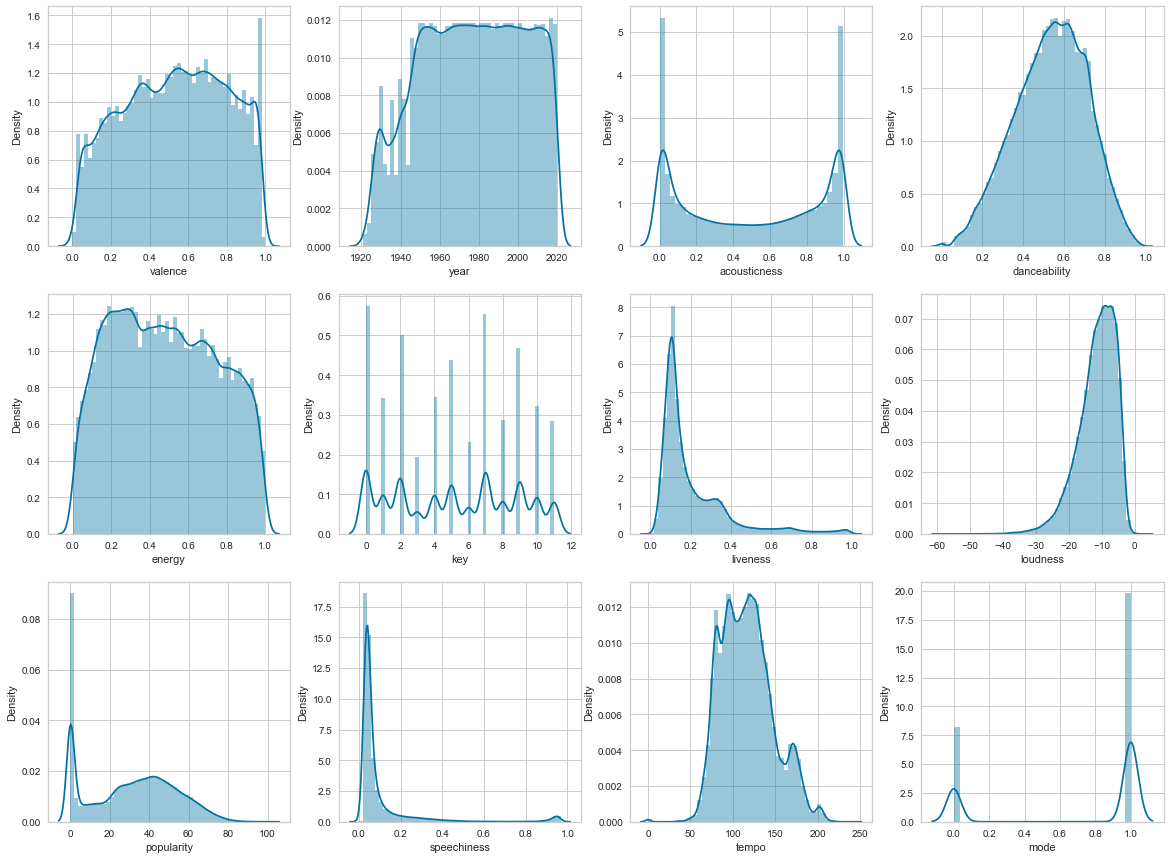

In [11]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,15))

sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['year'],ax=ax[0,1])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(data['energy'],ax=ax[1,0])
sns.distplot(data['key'],ax=ax[1,1])
sns.distplot(data['liveness'],ax=ax[1,2])
sns.distplot(data['loudness'],ax=ax[1,3])
sns.distplot(data['popularity'],ax=ax[2,0])
sns.distplot(data['speechiness'],ax=ax[2,1])
sns.distplot(data['tempo'],ax=ax[2,2])
sns.distplot(data['mode'],ax=ax[2,3])


<AxesSubplot:>

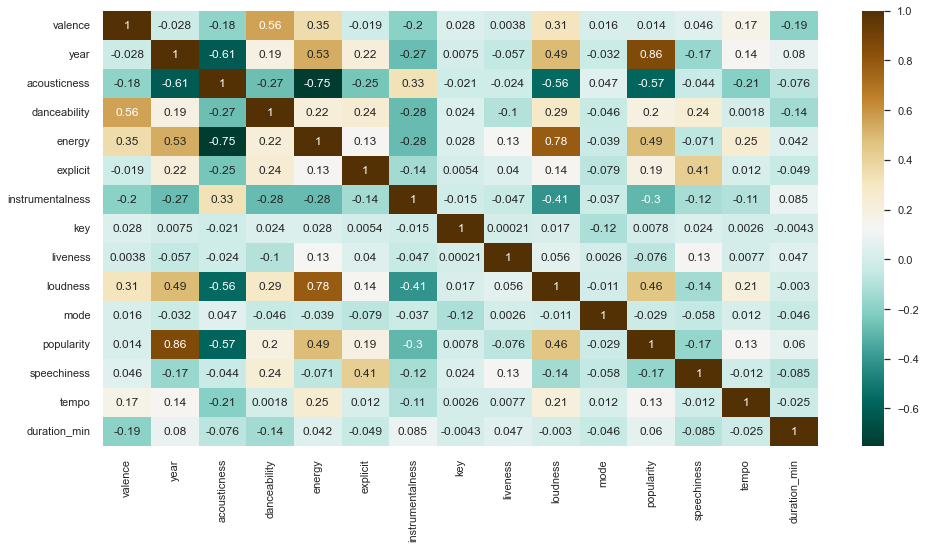

In [12]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

Strong correlations can be seen with values>0.75 like popularity-year | loudness-energy | energy-acousticness

1) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

2) Acousticness is highly negatively correlated with energy, loudness, and year.

3) Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dakiti'),
  Text(1, 0, 'Mood (feat. iann dior)'),
  Text(2, 0, 'What You Know Bout Love'),
  Text(3, 0, 'WAP (feat. Megan Thee Stallion)'),
  Text(4, 0, 'Blinding Lights'),
  Text(5, 0, 'Holy (feat. Chance The Rapper)'),
  Text(6, 0, 'Lonely (with benny blanco)'),
  Text(7, 0, 'you broke me first'),
  Text(8, 0, 'Relación - Remix'),
  Text(9, 0, 'Head & Heart (feat. MNEK)')])

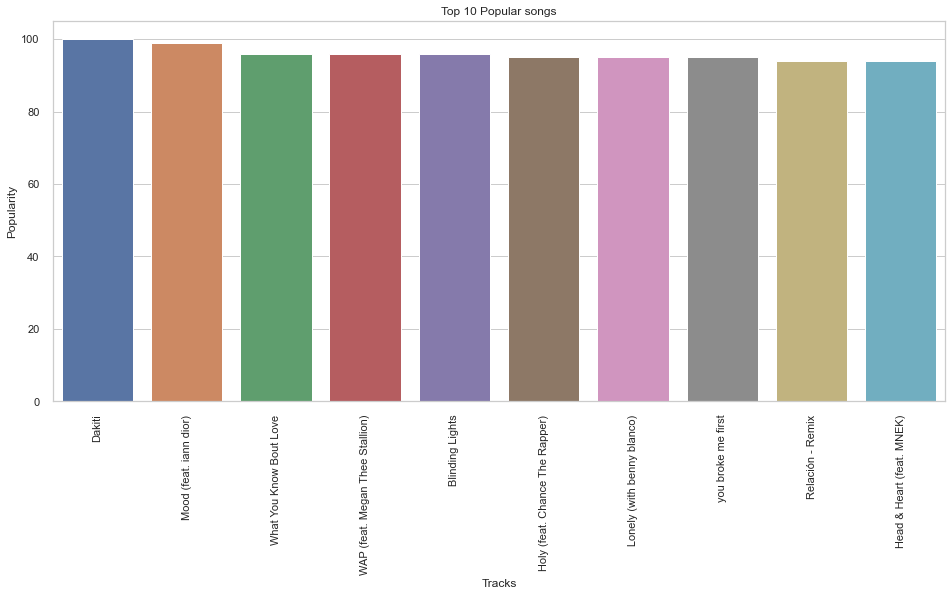

In [13]:
#Most Popular tracks
fig,axis = plt.subplots(figsize=(16,7))
popular=data.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)
axis=sns.barplot(popular.index,popular)
axis.set_title('Top 10 Popular songs')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Beatles'),
  Text(1, 0, 'Frank Sinatra'),
  Text(2, 0, 'Elvis Presley'),
  Text(3, 0, 'The Rolling Stones'),
  Text(4, 0, 'Fleetwood Mac'),
  Text(5, 0, 'Bob Dylan'),
  Text(6, 0, 'Led Zeppelin'),
  Text(7, 0, 'Queen'),
  Text(8, 0, 'Johnny Cash'),
  Text(9, 0, 'The Beach Boys')])

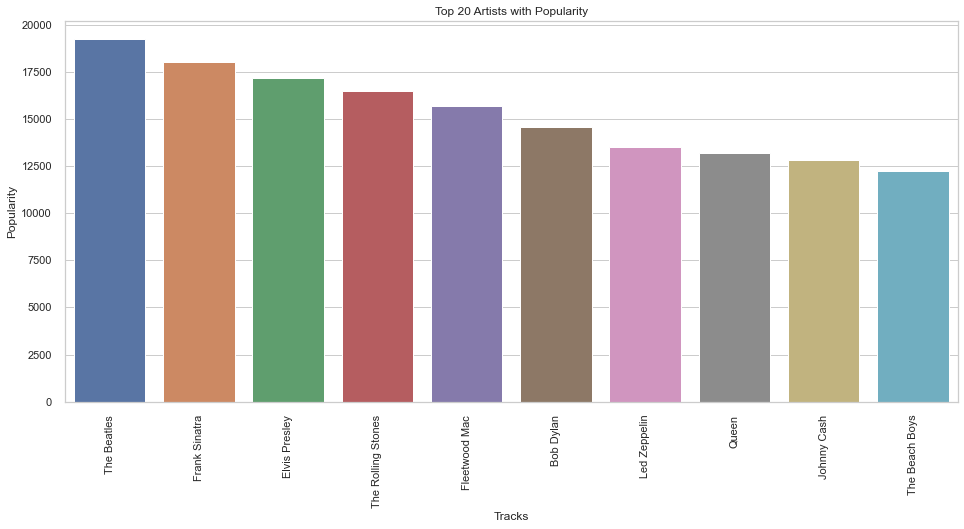

In [14]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:10]
axis = sns.barplot(popular.index,popular)
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

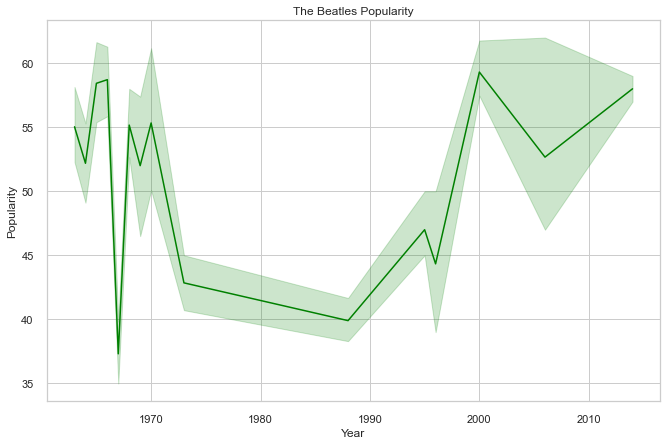

In [15]:
# visualize the popularity of The Beatles songs over the year
Beatles = data[data['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


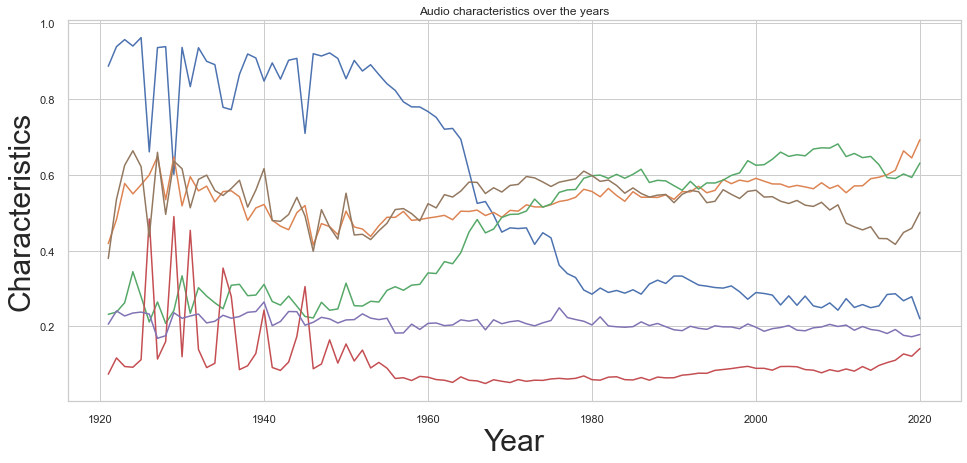

In [16]:
columns=["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(16,7))
for c in columns:
    x=data.groupby('year')[c].mean()
    sns.lineplot(x.index,x)
plt.title('Audio characteristics over the years')
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 30}, loc = 'upper right')
plt.show()

- Danceability has varied significantly, but has stayed mostly at the same level since 1980.
- Energy seems to be inversely related to acousticness: increasing
- Speechiness varied a lot. Due to rap songs there are more speech used.
- Liveness looks like it has always stayed relatively low. Most recorded music on Spotify was made with not audience present.
- Valence seems to have risen until 2000 with energy and danceability, but has fallen since.

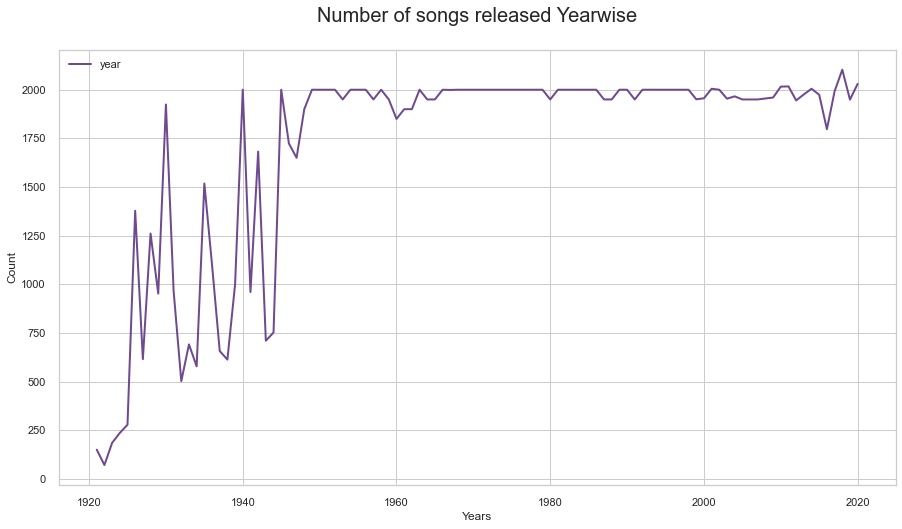

In [17]:
year = pd.DataFrame(data['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

Feature Selection

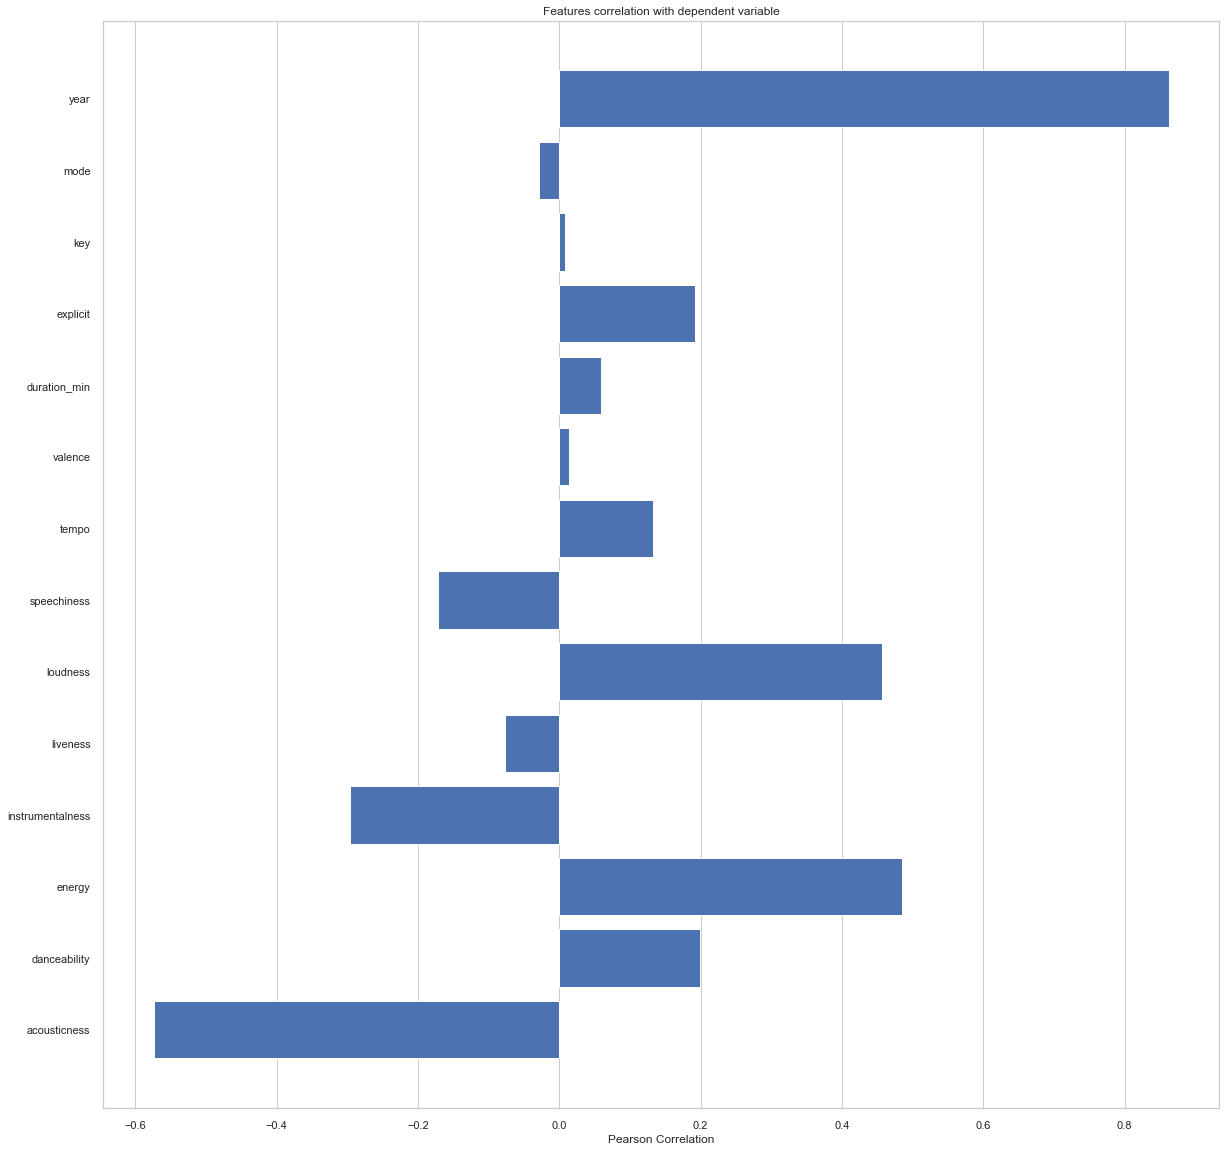

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [18]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

In [19]:
cols = list(pd.read_csv('data/data.csv'))
df1 = pd.read_csv('data/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train,X_test,Y_Train,Y_test=train_test_split(df1.drop('popularity',axis=1),df1['popularity'],test_size=0.2,random_state=42)


In [20]:
X_train.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
74462,0.484,2017,0.2060,['Christian French'],0.550,234192,0.580,0,0.000001,4,0.1190,-7.687,0,0.0784,82.270
146712,0.763,1975,0.5110,['The Marshall Tucker Band'],0.528,150933,0.812,0,0.000284,2,0.1570,-4.983,1,0.0517,110.442
158411,0.931,1959,0.8230,"[""Anita O'Day""]",0.460,125707,0.303,0,0.000000,0,0.0676,-12.567,0,0.1070,170.608
109710,0.329,1942,0.0117,['Orchestra Studio 7'],0.582,224967,0.443,0,0.868000,7,0.0895,-12.506,1,0.0307,94.825
128817,0.585,1960,0.7820,['Quincy Jones'],0.681,138467,0.312,0,0.072800,8,0.1690,-11.488,1,0.0723,121.058


In [21]:
n_features = data.shape[1]
n_samples = data.shape[0]

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                        'max_depth': [None,5,6,7,8,9,10,11],
                        'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                        'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                        'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
grid.fit(X_train,Y_Train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, Y_Train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


ValueError: could not convert string to float: "['Christian French']"

In [22]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0

      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats

    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X


#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))


class Tempo():
    """Eliminates Zero values from tempo columns and replace it
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [24]:
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, Y_Train).transform(X_train, Y_Train)
X_test = artists_transformer.transform(X_test, Y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [25]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [26]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [27]:
# Divide the popularity by 100
y_train = Y_Train / 100
y_test = Y_test / 100

In [28]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None,
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

Mean absolute error of this model: 0.073


In [29]:
def Randomforest(X_train,y_train,X_test,y_test):
    """
    Design Random Forest Regressor model and returns r2-score and Mean squared Error for Train and Test Datasets
    INPUT:
    :param X_train:
    :param y_train:
    :param X_test:
    :param y_test:
    OUTPUT:
    Test Accuracy
    Mean Absolute Error
    r2-score for Train and Test datasets
    """
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)

    preds = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    mae = (abs(y_test - preds)).mean()
    y_train_pred = clf.predict(X_train)

    y_test_pred = clf.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)

    r2_test= r2_score(y_test, y_test_pred)

    return accuracy,mae,r2_train,r2_test

accuracy,mae,r2_train,r2_test =  Randomforest(X_train,y_train,X_test,y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))
print("Mean Absolute Error: {:.4f} ".format(mae))
print("r2-score of Train Dataset is {} and Test Dataset is {}".format(r2_train*100, r2_test*100))

Test Accuracy: 77.1985
Mean Absolute Error: 0.0762 
r2-score of Train Dataset is 97.59644639826254 and Test Dataset is 77.19847095276455


In [30]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [31]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)

for col in num.columns:
    normalize_column(col)

In [32]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
data['pred'] = pred
normalize_column('pred')

In [33]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data

    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [1,10]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [34]:
recommender = Song_Recommender(data)
recommender.get_recommendations('canon in d', 10)

  0%|          | 0/170648 [00:00<?, ?it/s]


ValueError: could not convert string to float: 'Bedtime Baby'

In [ ]:
recommender.get_recommendations('dynamite', 10)